# MAT 186 Code Demo: Logistic Growth with Variable Reproduction Rate and Carrying Capacity

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
%config InlineBackend.figure_format='retina'

# set up nice fonts for plotting 
plt.rc('text', usetex=True) # NOTE: If you get a latex-related error, comment out this line and re-run the code!!!
plt.rc('font', family='serif')

In this brief, fun demo we use Euler's method on a problem that does not admit a closed-form solution! Specifically, we look at the ODE

$$
x'(t) = r(t)x(t)\left(1-\frac{x(t)}{K(t)}\right)
$$

where $x(t)$ is the unknown and $r(t),K(t)$ are *given* functions of time. By default, we set

$$
r(t) = \frac{1}{4}\left[1+\frac{9}{10}\cos\left(2\pi t\right)\right]
$$

and 

$$
K(t) = \frac{10}{13}\left[1+\frac{3}{10}\cos\left(4\pi t\right)\right].
$$

Note that both $r(t),K(t)$ are *periodic* and *in phase*. Such an equation could model the effect of seasonally-varying food supply and reproductive capabilities on population growth, but we won't discuss this point further here (in particular, we'll say nothing about what units $r,K$, and $x$ should have). 

We already know how to solve this problem when $r,K$ are fixed nonnegative real numbers. When $r, K$ are allowed to vary, however, we can no longer write down a solution exactly! Thanks to Euler's method, however, we can get a good numerical approximation of the solution $x(t)$. 

First, to make the forthcoming code cleaner, let's define some functions representing $r(t), K(t)$, and the right-hand side of the ODE, which we'll call $f(t,x)$. 

In [2]:
def r(t):
    """Generalized linear growth rate."""
    return (1.+0.9*np.cos(2.*np.pi*t))/(4.)
def K(t):
    """Generalized carrying capacity."""
    return (1.+0.3*np.cos(2.*2.*np.pi*t))/(1.3)
def f(t,x):
    """Right-hand side of the generalized logistic ODE."""
    return r(t)*x*(1.-x/K(t))

Next, we define the parameters of our simulation and initialize the solution storage array. We choose an initial state

$$
x(0) = 0.4
$$

by default, but please feel free to experiment with different initial states yourself!

In [3]:
T = 30. # total simulation runtime
dt = 1e-2 # time-step
n = int(T/dt) # total number of time samples

x0 = 0.4 # initial state

x = np.zeros(n, dtype=float) # array for storing solution samples. 
x[0]= x0

The following code block actually implements Euler's method for this problem. 

In [4]:
for n in np.arange(1,n):
    x[n]= x[n-1] + dt*f(n*dt, x[n-1])

Notice how we didn't really have to wait that long for the simulation to finish! 

With the solution stored in memory, we can use matplotlib to make a nice picture of $x(t)$ vs. $t$. 

The code for this looks a little long at first glance, but all we're really doing is fine-tuning settings to make sure we get a high-quality graph at the end of the day: a bad graph can be worse than no graph at all, so it's worth spending time getting it looking good! Plus, you can re-use graphing code over and over again, so once you spend the time getting a single graph looking good you've got the tools to make *all the graphs you draw in the future* look good as well. 

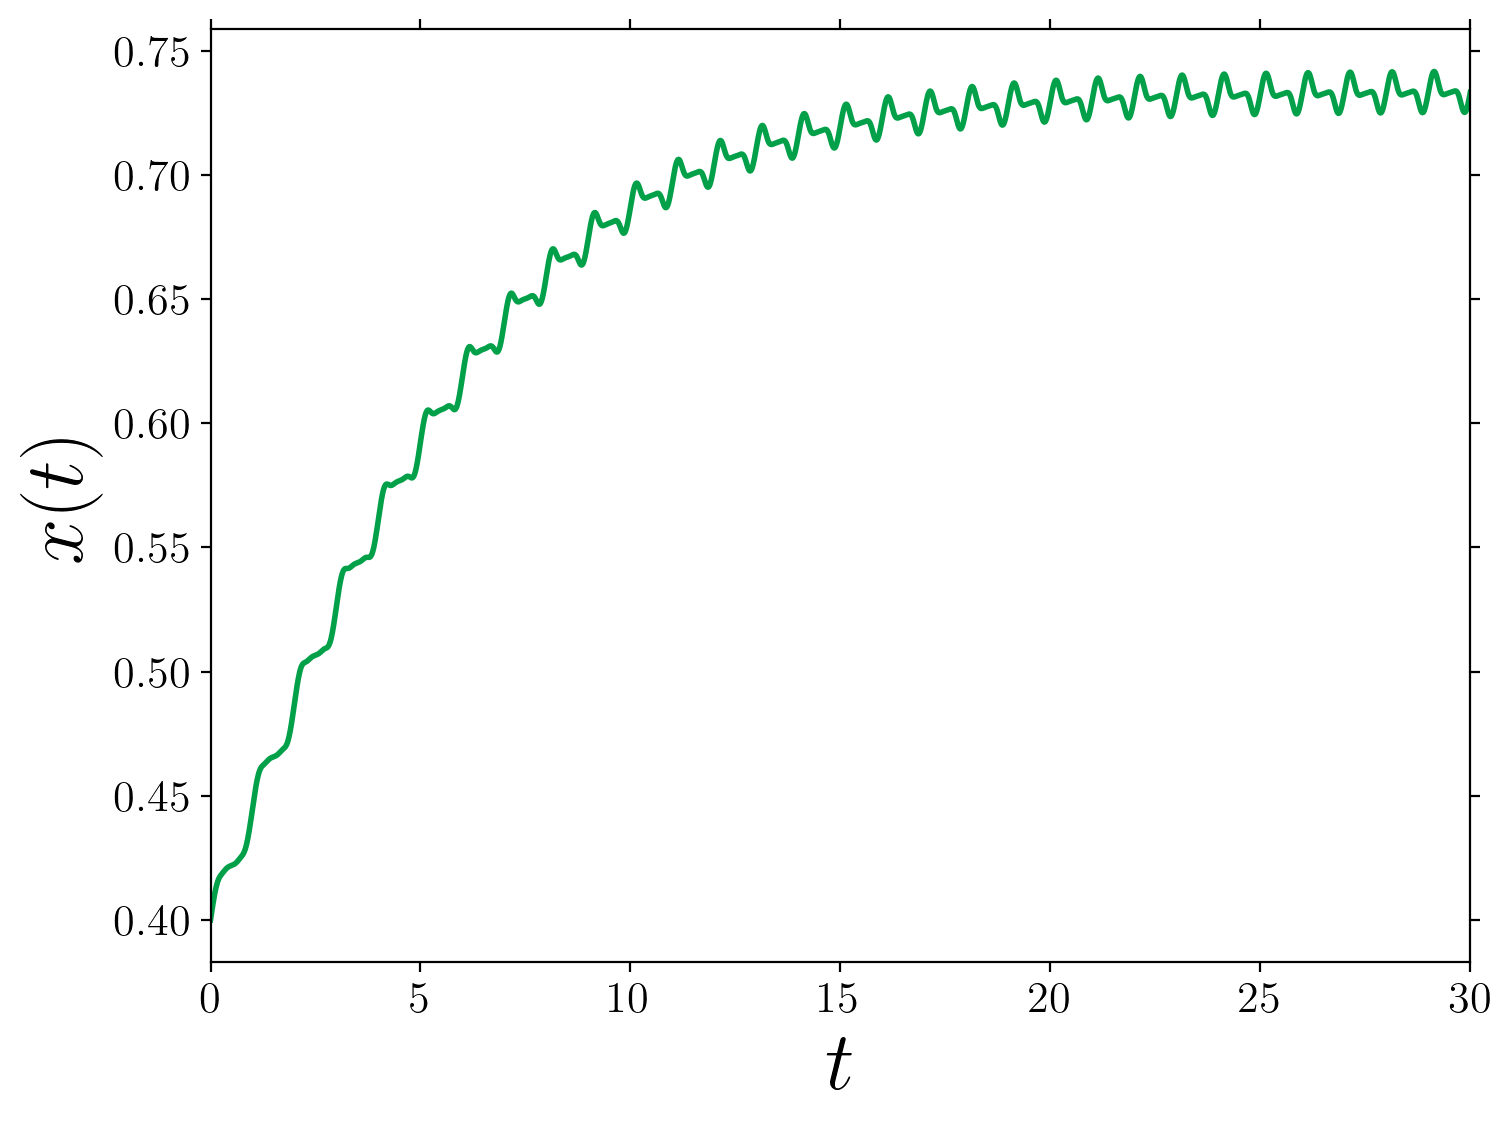

In [5]:
fig, ax =plt.subplots()

tt=np.linspace(0,T,n+1, endpoint=True)

plt.plot(tt, x, linewidth=2, color='xkcd:emerald')

plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams["axes.edgecolor"] = 'k'

plt.xlim([0,T])

plt.xlabel(r"$t$", fontsize=30, color = 'k')
plt.ylabel(r"$x(t)$", fontsize=30, color = 'k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')

plt.tight_layout()

fig.set_size_inches(8, 6)
#plt.savefig('non_auto_logistic' + '.jpg', dpi=700) # uncomment this if you want to save the image in your cd. 

plt.show()

Anyone who says they could guess the fine details of this shape without a numerical method is lying!

You should run the code with successively smaller $\Delta t$ to convince yourself the output is correct.